In [1]:
from typing import Dict, Iterable, Optional

import numpy as np
import torch
from torch.distributions import Normal, Poisson
from torch.distributions import kl_divergence as kld
from torch import tensor
from complementary_models import HALOLDVIR as HALOVI
from complementary_models import HALOLDVAER as HALOVAE
import scanpy as sc
import scvi
import pandas as pd
# torch.autograd.set_detect_anomaly(True)

Global seed set to 0


In [4]:
### test whole data with RNA only 
adata_multi = sc.read_h5ad("openproblem/neurips_traj.h5ad")
adata_multi.X = adata_multi.layers['counts']
newadata = adata_multi[adata_multi.obs['GEX_pseudotime_order'].notna()].copy()
adata_mvi = scvi.data.organize_multiome_anndatas(newadata)
# Reorder the categories for color consistency with the manuscript.
all_clusters = ['HSC','MK/E prog','Proerythroblast','Erythroblast','Normoblast']
adata_mvi.obs['cell_type'] = adata_mvi.obs['cell_type'].cat.reorder_categories(all_clusters)
# colors = ['#dd5129', '#427084', '#299693', '#71b278', '#fab255']
colors = ["#a82203","#208cc0","#f1af3a","#cf5e4e","#637b31"]

In [6]:
HALOVI.setup_anndata(adata_mvi, batch_key="batch", categorical_covariate_keys = ["Site", "DonorNumber"],time_key='GEX_pseudotime_order')
model = HALOVI(
    adata_mvi,
    n_genes=(adata_mvi.var['feature_types']=='GEX').sum(),
    n_regions=(adata_mvi.var['feature_types']=='ATAC').sum(),
)

n_genes :13431


In [8]:
model.module.set_train_params(expr_train=True, acc_train=True)
model.module.set_finetune_params(0)
model.train(max_epochs=50)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=50 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [05:51<00:00,  7.04s/it, loss=4.67e+04, v_num=1]


In [4]:
model = model.load("linearModel", adata_mvi)

INFO     File linearModel/model.pt already downloaded                                        
n_genes :14583


In [5]:
model.module.set_train_params(expr_train=True, acc_train=True)
model.train(max_epochs=100)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=100 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [03:54<00:00,  2.34s/it, loss=1.07e+05, v_num=1]


In [9]:
model.module.set_train_params(expr_train=True, acc_train=False)
model.module.set_finetune_params(0)
model.train(max_epochs=5)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=5 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 5/5: 100%|██████████| 5/5 [00:33<00:00,  6.74s/it, loss=4.21e+03, v_num=1]


In [10]:
model.module.set_train_params(expr_train=False, acc_train=True)
model.module.set_finetune_params(0)
model.train(max_epochs=5)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=5 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 5/5: 100%|██████████| 5/5 [00:33<00:00,  6.78s/it, loss=1.11e+04, v_num=1]


In [11]:
model.module.set_train_params(expr_train=True, acc_train=True)
model.module.set_finetune_params(2)
model.train(max_epochs=50)

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/scvi/model/base/_training_mixin.py:67: UserWarning: max_epochs=50 is less than n_epochs_kl_warmup=400. The max_kl_weight will not be reached during training.
  warnings.warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 44/50:  86%|████████▌ | 43/50 [07:05<01:08,  9.84s/it, loss=1.44e+05, v_num=1]

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:726: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [6]:
latent_expr, latent_acc,latent_expr_dep, latent_atac_dep, latent_expr_indep, latent_atac_indep, times  = model.get_latent_representation()

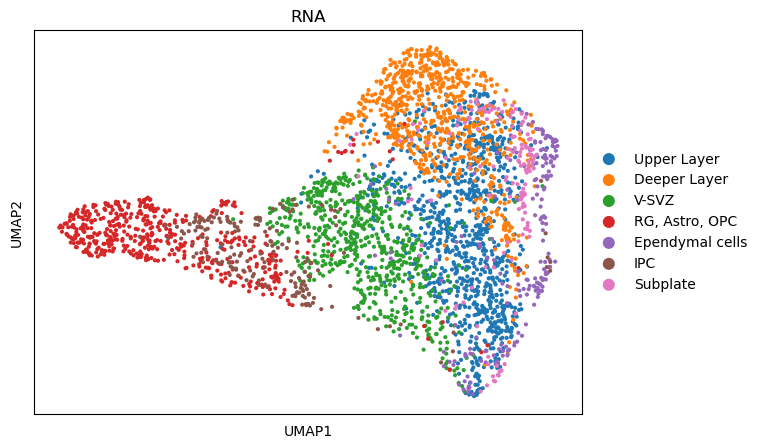

In [7]:
import matplotlib.pyplot as plt
adata_mvi.obsm["latent"] = latent_expr
sc.pp.neighbors(adata_mvi, use_rep="latent", n_neighbors=25)

sc.tl.umap(adata_mvi,min_dist =0.5)
# sc.tl.louvain(adata_mvi)

%matplotlib inline
# sc.pl.umap(adata_mvi, color=['celltype'])
sc.pl.scatter(adata_mvi,color='celltype',basis='umap',
             title = 'RNA')
plt.show()

In [14]:
from complementary_models import torch_infer_nonsta_dir


latent_atac_indep = torch.tensor(latent_atac_indep).to('cuda')
latent_expr_indep = torch.tensor(latent_expr_indep).to('cuda')
times = torch.tensor(times).to('cuda')

score3, _, _ = torch_infer_nonsta_dir(latent_atac_indep, latent_expr_indep, times)
score4, _, _ = torch_infer_nonsta_dir(latent_expr_indep, latent_atac_indep, times)
score3 - score4

tensor(-0.0002, device='cuda:0', dtype=torch.float64)

In [12]:
loadmatrix = model.module.get_loadings()

In [13]:
loadmatrix.shape

(13431, 24)

In [22]:
loadmatrix_dep = np.abs(np.sum(np.abs(loadmatrix[:, :5]), axis=1))
loadmatrix_indep = np.abs(np.sum(np.abs(loadmatrix[:, 5:]), axis=1))
loadatrix = np.concatenate([[np.abs(loadmatrix_dep)], [np.abs(loadmatrix_indep)]], axis=0)

In [32]:
print(max(loadmatrix_dep), min(loadmatrix_dep))
print(max(loadmatrix_indep), min(loadmatrix_indep))

2.4083235 0.07539657
9.816391 0.60834503


In [33]:
dep_index1 =  np.where(loadmatrix_dep > 1.0)
dep_index2 =  np.where(loadmatrix_indep < 2.0)

In [34]:
## dependent genes
print (((set(dep_index1[0]) & set(dep_index2[0]))))

{3209, 9355, 13200, 7315, 5908, 4501, 9850, 7708, 8093, 5151, 12704, 9376, 4898, 6692, 1061, 8104, 3241, 5803, 5427, 10937, 314, 2106, 4284, 8381, 8259, 7751, 7752, 10697, 5065, 5451, 9804, 13389, 12238, 10959, 10448, 11857, 5714, 4182, 2943, 4824, 9688, 6623, 4835, 3688, 7149, 11119, 10484, 2424, 4858, 1787, 8703}


In [20]:
dep_index1 =  np.where(loadmatrix_indep > 0.2)
dep_index2 =  np.where(loadmatrix_dep < 0.1)

In [17]:
## independent genes

print(len(set(dep_index1[0]) & set(dep_index2[0])))

89


In [15]:
x = np.array([[0, 10, 20], [20, 30, 40]])
print("Values bigger than 10 =", x[x>10])
print("Their indices are ", np.nonzero(x > 10))


Values bigger than 10 = [20 20 30 40]
Their indices are  (array([0, 1, 1, 1]), array([2, 0, 1, 2]))


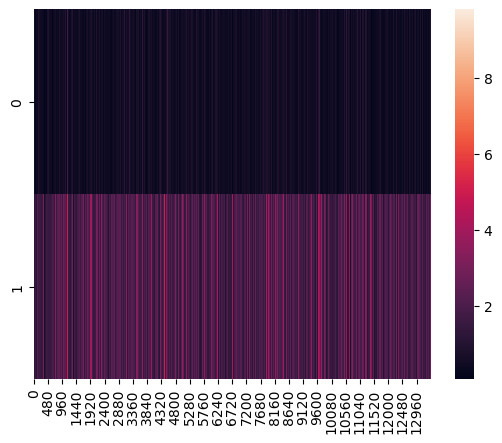

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(loadatrix)
plt.show()

/home/haiyi/anaconda3/envs/halo/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


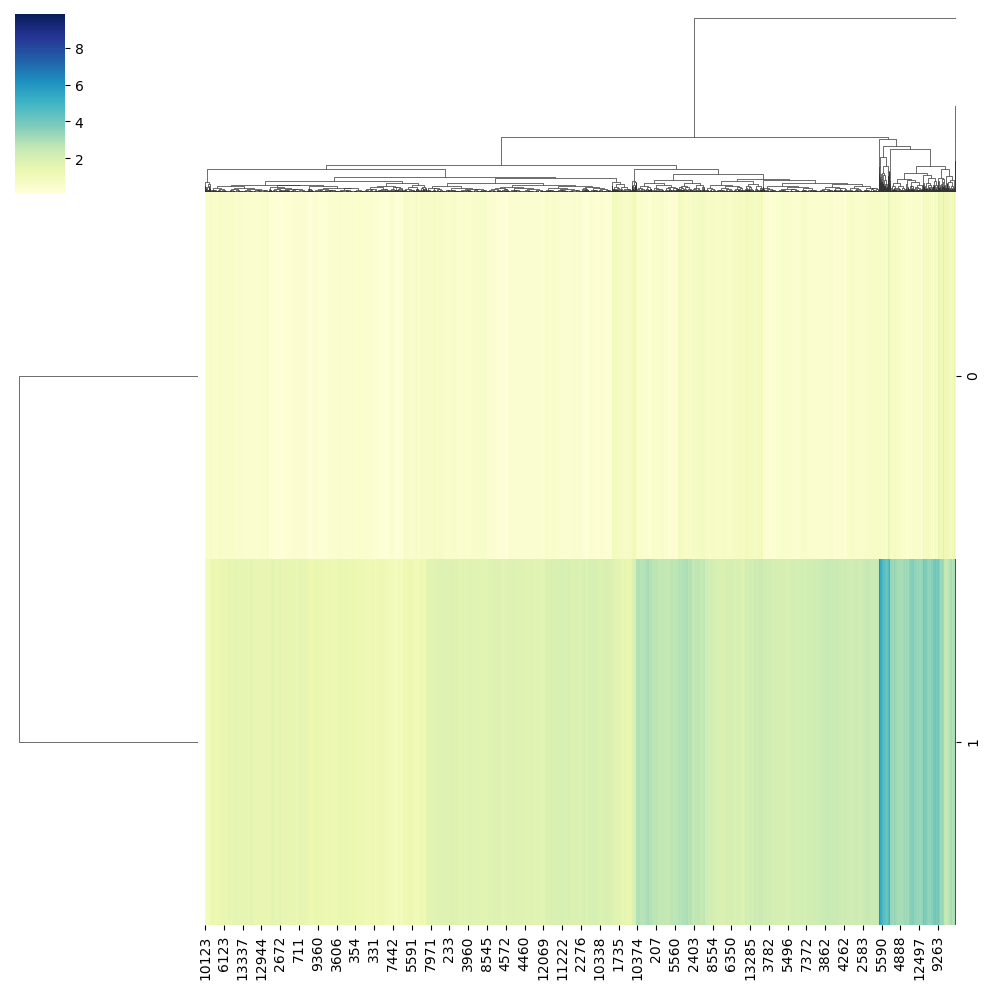

In [38]:
p = sns.color_palette('YlGnBu', as_cmap=True)

sns.clustermap(loadatrix, cmap= p)
plt.savefig("nips_loading.pdf")

In [ ]:
z,z_atac,z_rna = mvi_p.get_latent_representation()